In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
import numpy as np
import xarray as xr

from src.data import SAMRun
from uwnet import thermo

In [5]:
class NGAqua:
    @property
    def data_2d(self):
        path = "../data/raw/2018-05-30-NG_5120x2560x34_4km_10s_QOBS_EQX/coarse/2d/all.nc"
        ds = xr.open_dataset(path).sortby('time')
        return ds.assign(NPNN=thermo.net_precipitation_from_prec_evap(ds))

high_res = "../data/runs/2019-04-30-model268-epoch5-res512x256x34"
low_res = "../data/runs/2019-05-01-model268-epoch5-res128x64x34/"



ng = NGAqua()


hi_run = SAMRun(high_res, case='control')
lo_run = SAMRun(low_res, case='control')
ng_run = NGAqua()

def plot_tropics_mean_pw(case, key):
    z= case.data_2d[key].sel(y=slice(4.5e6, 5.5e6), time=slice(None, 110)).mean(['x', 'y'])
    z.plot()

    
def plot_tropics_field(key):

    plot_tropics_mean_pw(hi_run, key)
    plot_tropics_mean_pw(lo_run, key)
    plot_tropics_mean_pw(ng_run, key)
    plt.legend(['40km', '160 km', 'NG-Aqua'])
    

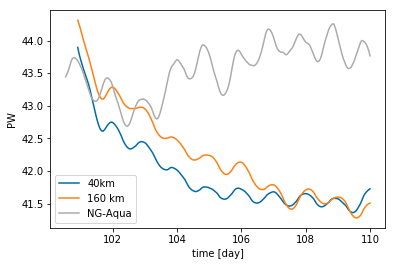

In [10]:
plot_tropics_field('PW')

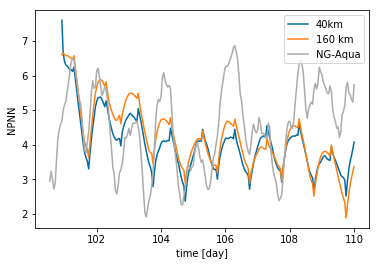

In [11]:
plot_tropics_field('NPNN')

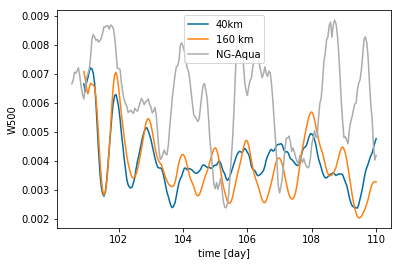

In [12]:
plot_tropics_field('W500')

The 40 km simulation does not produce more precip on average than the 160km one. It still does not rain enough.

# Snapshots

In [19]:
def plot_pw(run, key='PW'):
    run.data_2d[key].sel(time=105, method='nearest').plot()

## PW

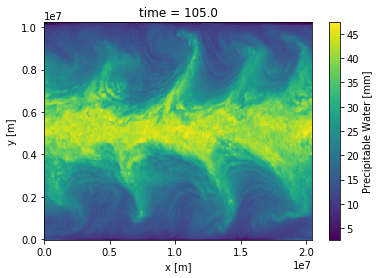

In [20]:
plot_pw(hi_run, 'PW')

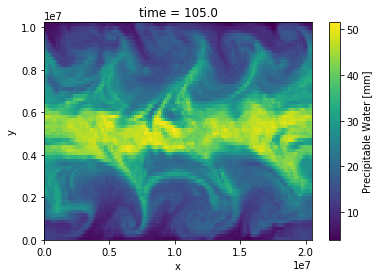

In [21]:
plot_pw(ng_run, 'PW')

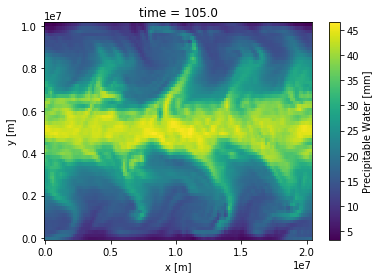

In [22]:
plot_pw(lo_run, 'PW')

## Net Precip

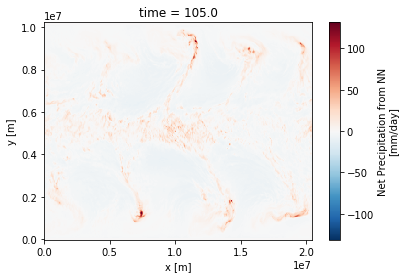

In [23]:
plot_pw(hi_run, 'NPNN')

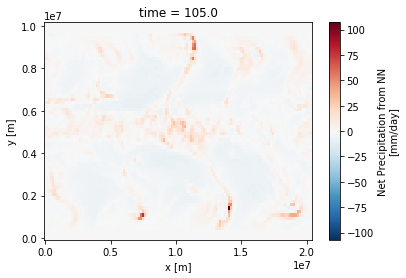

In [24]:
plot_pw(lo_run, 'NPNN')

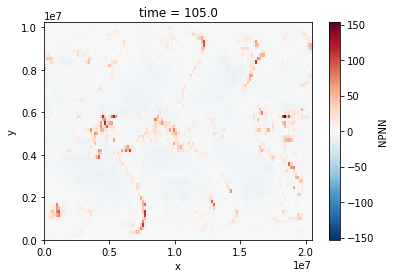

In [25]:
plot_pw(ng_run, 'NPNN')

The 40km run does more accurately produce more extreme precip in the extra tropics than the 160km run.